In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = (datetime.now() + timedelta(1)).date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2022, 2, 13))

In [4]:
SDS = 0.05 * (0.8 ** np.linspace(-4, 10, 7))
SD = SDS[TODAY.weekday()]
SD

0.005368709120000003

In [5]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADSK', 'AMD', 'AMZN', 'ANET', 'APPH', 
    'AXON', 'BBY','BROS', 'BYND', 'CHWY', 'COIN', 'COUR', 'CRWD',
    'DDOG', 'DKNG', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'EVGO', 'FTCH',
    'FUV', 'FVRR', 'GH', 'GMED', 'GOOG', 'INTG', 'ISRG', 'JD', 'LSPD',
    'LULU','MDB', 'MEDP', 'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR',
    'NVDA', 'NYT', 'OKTA', 'OPEN', 'PANW', 'PINS', 'PTON', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'ROKU', 'SE', 'SHOP', 'SOLO', 'SPLK', 'SQ',
    'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 'TWTR',
    'UPST', 'VEEV', 'WK', 'XPEV', 'ZEN', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA',  # NY Stock Exchange (total)
           '^W5000'] # Wilshire 5k
len(SYMBOLS)

72

In [6]:
#batcher = Batcher(SYMBOLS, INDICES)
#batch = batcher.get_batch_from_weekday(TODAY.weekday())
#batch

In [7]:
#batch = SYMBOLS + INDICES # run all
batch = INDICES
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  4 of 4 completed
Generating derived columns...
   ...^GSPC
   ...^IXIC
   ...^NYA
   ...^W5000


In [8]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [9]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [10]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {
                str_to_tuple(k): v 
                for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data. '
              'Initialized as None.')

In [11]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {
            str(k): v 
            for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [12]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [13]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 ^GSPC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 15.048326340089888
Refitting current best...
Current best ma returns: 16.401660636541475
Fraction Invested: 0.955625640619872
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 16.254239130514094
Invested: 0.955625640619872
New best: 16.259116640941738
Invested: 0.955625640619872
New best: 16.26456705507259
Invested: 0.955625640619872
New best: 16.274567757440327
Invested: 0.955625640619872
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 15.048326340089888
Refitting current best...
Current best ew_ma returns: 18.07618586794861
Fraction Invested: 0.9587292676878186
Beginning random search...
Round: 10
Begin

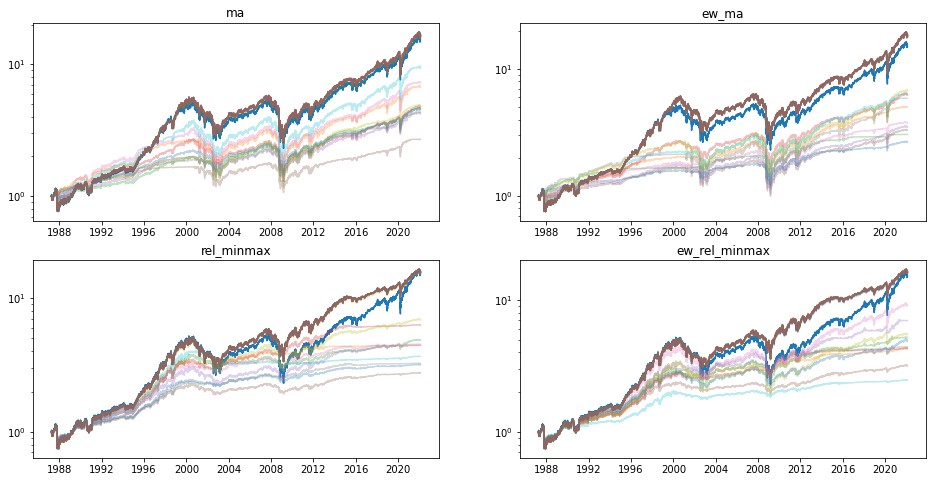

Saving ^GSPC params...



----------------------------------------------------------------------
                                 ^IXIC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 31.916570691556842
Refitting current best...
Current best ma returns: 40.75110077863982
Fraction Invested: 0.9972759998461759
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 40.74958828727871
Invested: 0.9972759998461759
New best: 40.74971340378428
Invested: 0.9972759998461759
New best: 40.750907531956216
Invested: 0.9972759998461759
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 31.916570691556842
Refitting current best...
Current best ew_ma returns: 35.658473102155256
Fraction Invested: 0.9980594882823609
Beginning random search...
Round: 10
Beginning adjusted search...
New bes

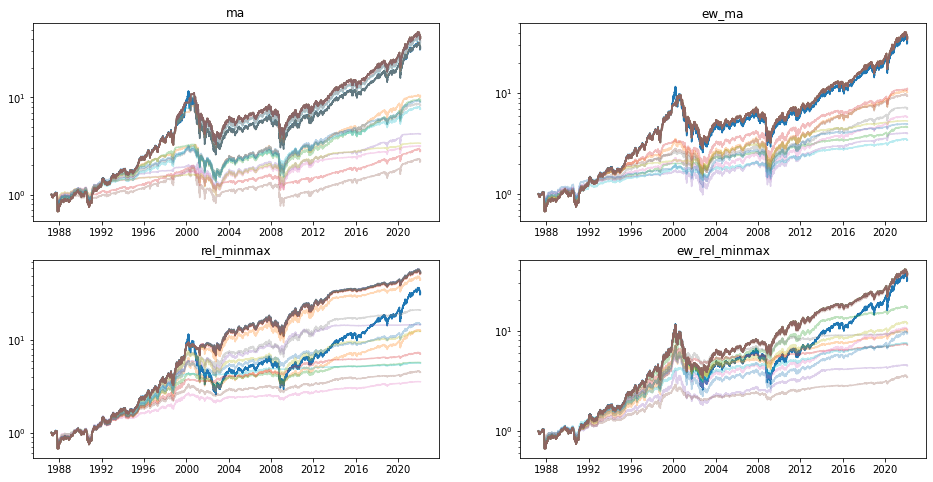

Saving ^IXIC params...



----------------------------------------------------------------------
                                 ^NYA
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 9.451130822947235
Refitting current best...
Current best ma returns: 11.368451518315036
Fraction Invested: 0.9999999637228756
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 11.314432509490432
Invested: 0.9999999637228756
New best: 11.32137046736754
Invested: 0.9999999637228756
New best: 11.327280517104557
Invested: 0.9999999637228756
New best: 11.327285166622058
Invested: 0.9999999637228756
New best: 11.338808014235909
Invested: 0.9999999637228756
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 9.451130822947235
Refitting current best...
Current best ew_ma returns: 9.7844974101125

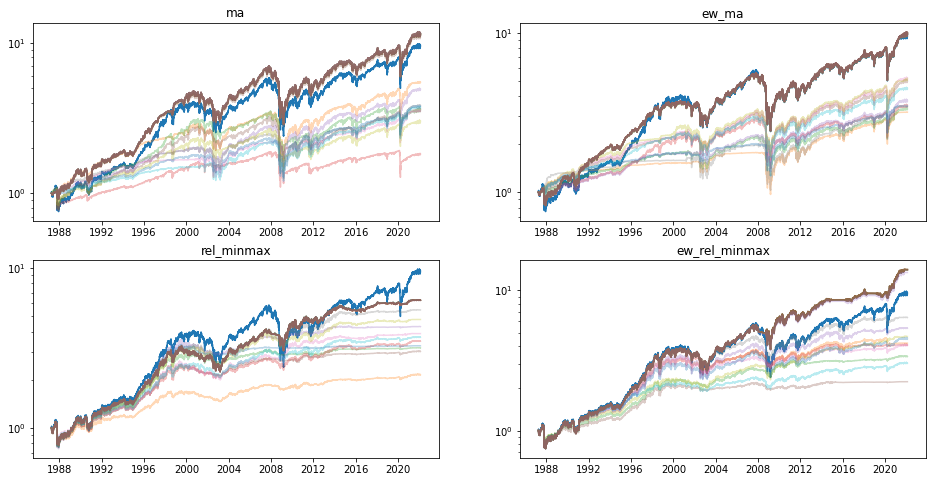

Saving ^NYA params...



----------------------------------------------------------------------
                                 ^W5000
----------------------------------------------------------------------
No saved data. Initialized as None


Beginning ma method...
--------------------------------------------------
Do nothing returns: 8.056408772106298
Refitting current best...
Current best ma returns: 8.198379821319323
Fraction Invested: 0.993020965034979
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 8.19777740292456
Invested: 0.993020965034979
New best: 8.197824288554934
Invested: 0.993020965034979
New best: 8.197842879481552
Invested: 0.993020965034979
New best: 8.193289028065728
Invested: 0.993020965034979
New best: 8.194027531023309
Invested: 0.993020965034979
New best: 8.19429608423182
Invested: 0.993020965034979
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 8.056408772106298
Refitting c

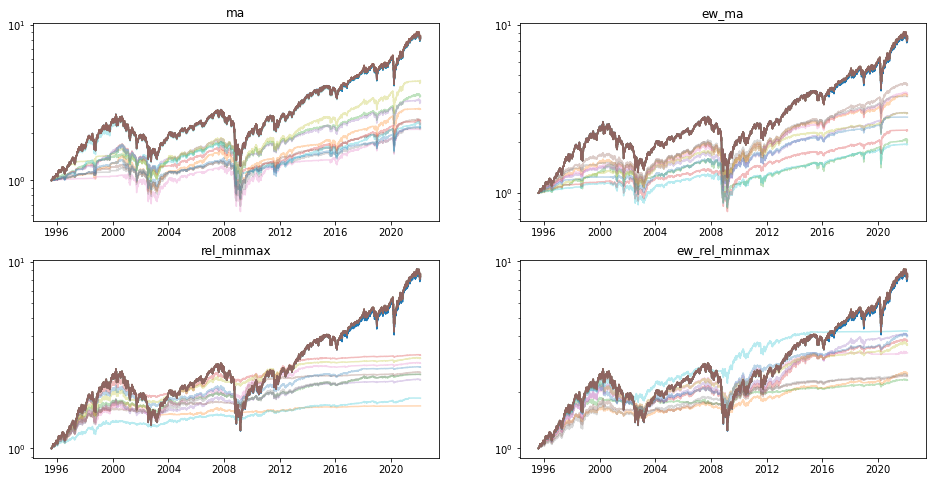

Saving ^W5000 params...


In [14]:
N_RAND = 10
N_ADJ = 15

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    try:
        best_params, best_returns = read_best_params(stock)
        stock_data = get_stock_data(stock, data)
        stock_data.fillna(method='ffill', inplace=True)
        stock_data.fillna(method='bfill', inplace=True)
        qp = QPercent(stock_data, 
                      N_CUTS, 
                      best_param_set=best_params, 
                      best_returns=best_returns, 
                      sd=SD)
        qp.run_sims(N_RAND, N_ADJ)
        best = get_best_param_set(qp)
        save_best_param_set(best, stock)
    except BaseException as e:
        print(f'Error encountered\n{e}')

In [15]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} '
                  f'({best_method})\n  {100 * best_pct:.2f}% in')
            data = best[best_method]
            print('time param:', data['time_param'])
            print('qs:')
            for rng, pct in data['q_params'].items():
                lower, upper = [float(x) for x in rng[1:-1].split(', ')]
                print(f'({lower:.3f} - {upper:.3f}): {pct:.3f}')
        except FileNotFoundError:
            print('No data for', stock)
            continue
        except:
            print('Bad Data for', stock)
            continue

In [16]:
ALL = SYMBOLS + INDICES
#get_summary(ALL)
get_summary(batch)


^GSPC:
  Best Return: 18.062050377144892 (ew_ma)
  95.87% in
time param: 1079
qs:
(0.000 - 0.468): 1.000
(0.468 - 0.631): 1.000
(0.631 - 0.658): 1.000
(0.658 - 0.669): 0.999
(0.669 - 0.671): 0.974
(0.671 - 0.680): 0.961
(0.680 - 0.963): 0.959
(0.963 - 0.971): 0.909
(0.971 - 0.980): 0.873
(0.980 - 1.000): 0.001

^IXIC:
  Best Return: 54.121070576988 (rel_minmax)
  23.76% in
time param: 1079
qs:
(0.000 - 0.208): 1.000
(0.208 - 0.627): 1.000
(0.627 - 0.638): 1.000
(0.638 - 0.656): 0.999
(0.656 - 0.691): 0.999
(0.691 - 0.698): 0.961
(0.698 - 0.700): 0.869
(0.700 - 0.727): 0.593
(0.727 - 0.728): 0.579
(0.728 - 1.000): 0.238

^NYA:
  Best Return: 14.098356695858493 (ew_rel_minmax)
  0.94% in
time param: 360
qs:
(0.000 - 0.060): 0.989
(0.060 - 0.496): 0.986
(0.496 - 0.596): 0.980
(0.596 - 0.652): 0.953
(0.652 - 0.679): 0.937
(0.679 - 0.844): 0.770
(0.844 - 0.849): 0.632
(0.849 - 0.917): 0.630
(0.917 - 0.940): 0.080
(0.940 - 1.000): 0.009

^W5000:
  Best Return: 8.324646393569923 (rel_minmax)

In [17]:
!say qp is dunzo

IXIC: Nasdaq